# plot timeseries

In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import plot_tools
import proc_cesm_le
import colorbrewer

In [2]:
%%time
tr85 = proc_cesm_le.open_ens('tr85','ann_dft_glb',['O2','TEMP'])
tr45 = proc_cesm_le.open_ens('tr45','ann_dft_glb',['O2','TEMP'])

print tr85
print tr45

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, time: 182, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon, time
Data variables:
    O2        (ens, time) float64 177.8 nan 177.8 177.8 177.8 177.8 177.8 ...
    TEMP      (ens, time) float64 3.716 nan 3.717 3.717 3.716 3.715 3.715 ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, n

In [3]:
%%time
tr85a = tr85.mean(dim='ens')
tr45a = tr45.mean(dim='ens')
tr85a = tr85a.compute()
tr45a = tr45a.compute()
print tr85a
print tr45a

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, time: 182, z_t: 60, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t       (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon, time
Data variables:
    O2        (time) float64 177.8 177.8 177.8 177.8 177.8 177.8 177.8 177.8 ...
    TEMP      (time) float64 3.716 3.716 3.717 3.717 3.717 3.717 3.717 3.718 ...
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) flo

1920-1939 avg:
177.775890954


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in greater
  if not reflexive


1920-1939 avg:
3.7181328624


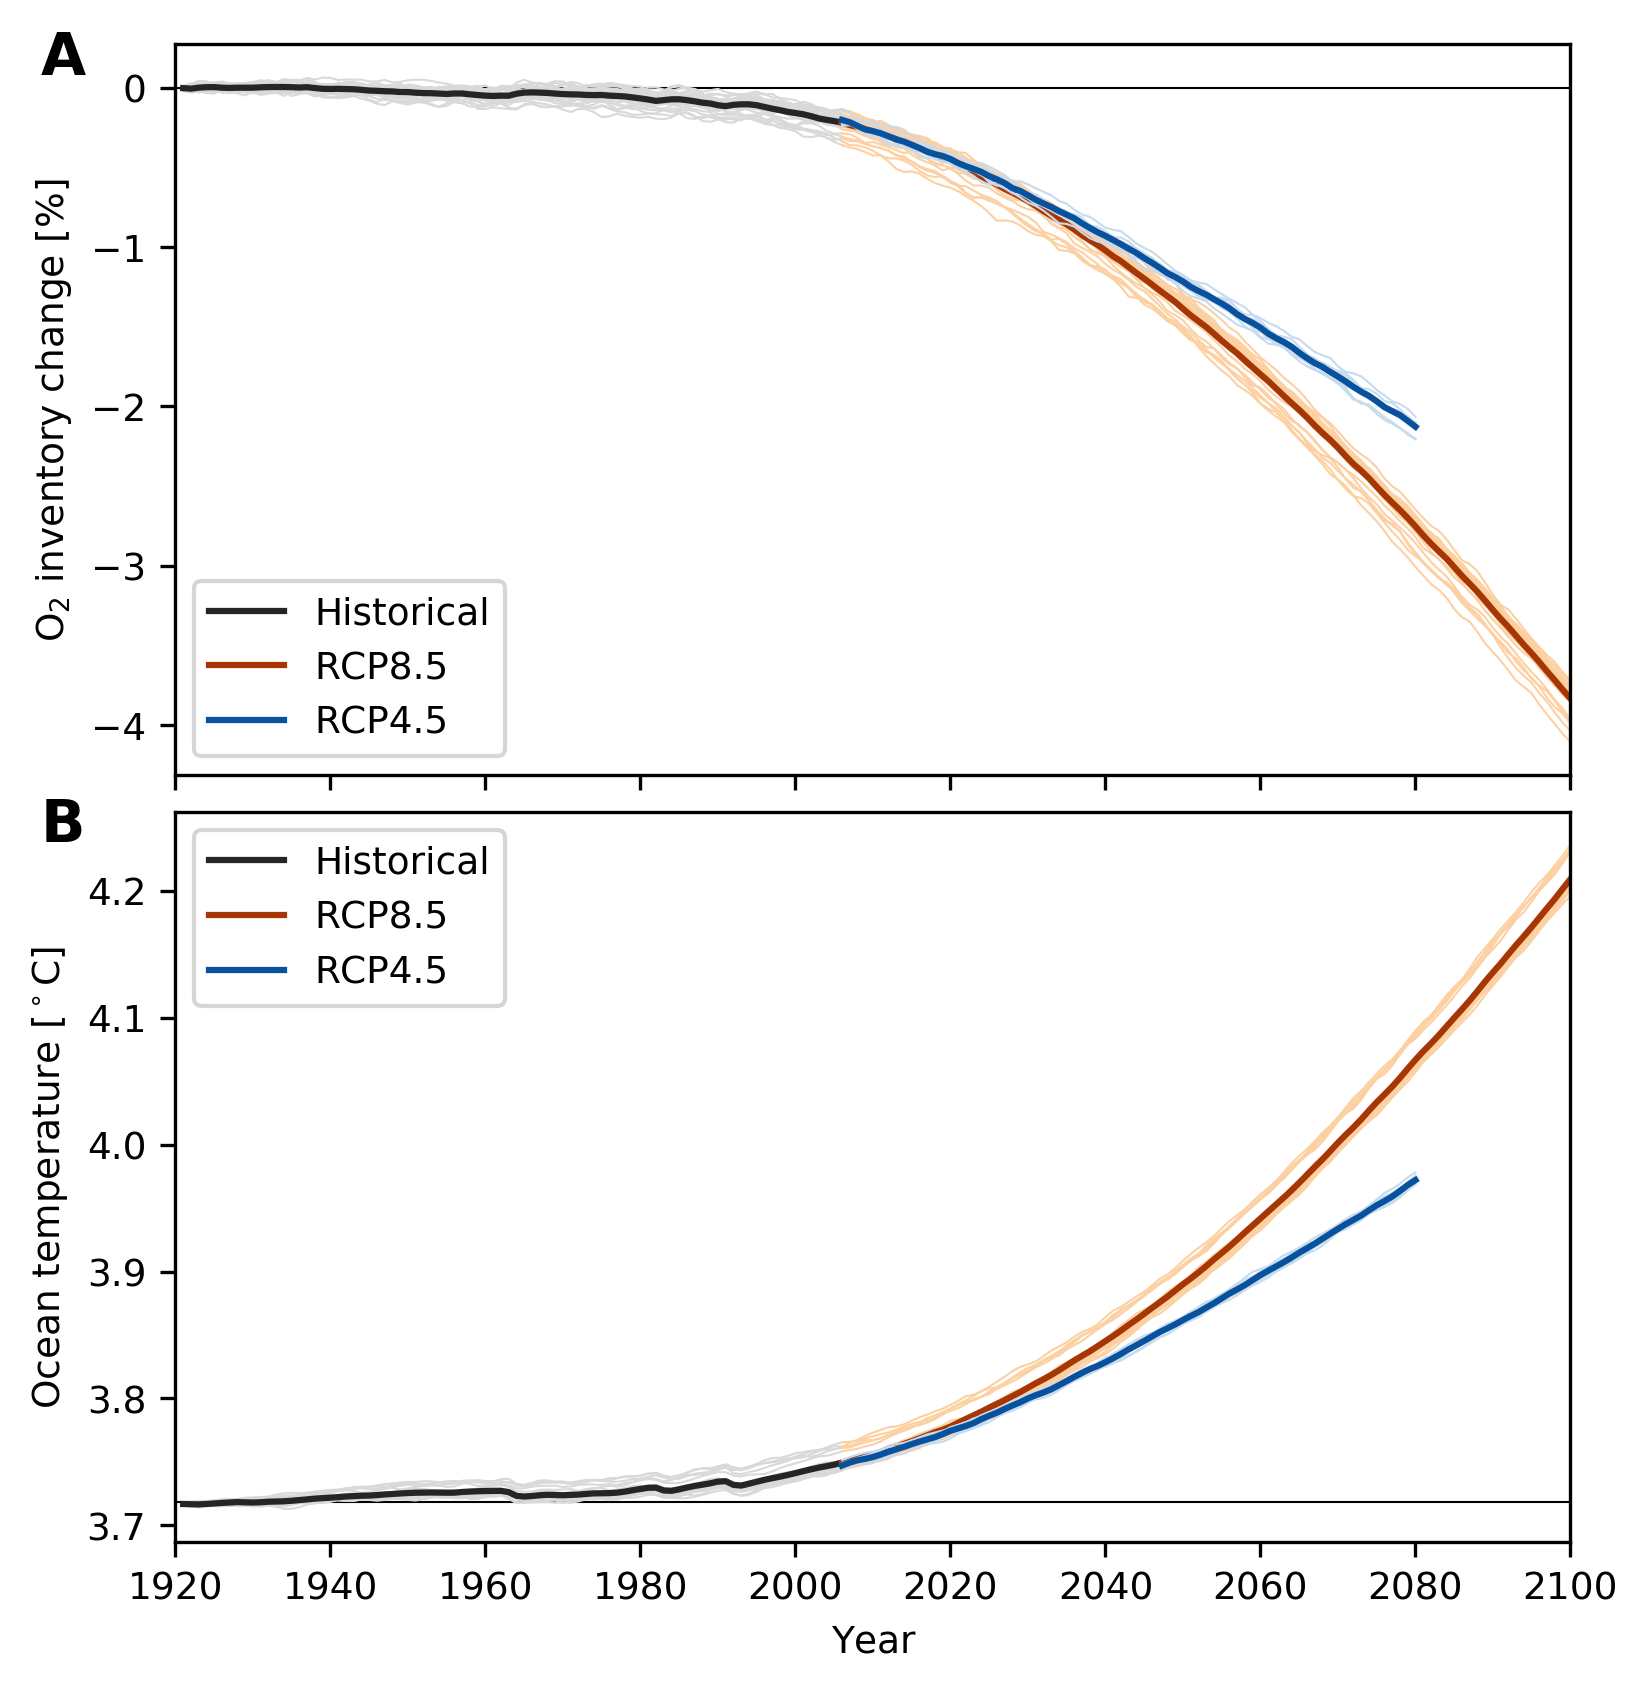

In [4]:
plot_name = os.path.join(diro['fig'],'cesm-global-timeseries.pdf')
            
fig = plt.figure(dpi=300,figsize=(6,10),facecolor='w')
gs = gridspec.GridSpec(3,1)

v = 'O2'
ax = [[]]*2

ax[0] = fig.add_subplot(gs[0,0])
#ax[0].minorticks_on()
#ax[0].tick_params(which='major',direction='out',width=1,  length=6, right='on',top='on')
#ax[0].tick_params(which='minor',direction='out',width=0.5,length=4, right='on',top='on')

ax[0].set_xlim((1920,2100))
ax[0].set_ylabel('O$_2$ inventory change [%]')
ax[0].set_xticklabels([])

baseline = tr85a[v][0:20].mean()

print('1920-1939 avg:')
print(baseline.values)

ax[0].axhline(0,color='black',linewidth=0.5)

#-- historical
nx = np.where(tr85a.year <= 2006)[0]
nx = slice(nx[0],nx[-1]+1)
for e in range(len(tr85.ens)):
    ax[0].plot(tr85.year[nx],100.*(tr85[v][e,nx]-baseline)/baseline,
            linewidth = 0.5,
            color=colorbrewer.singlehue('black')[6])
ph, = ax[0].plot(tr85a.year[nx],100.*(tr85a[v][nx]-baseline)/baseline,
            label = 'Historical',
            color=colorbrewer.singlehue('black')[1])

#-- future
nx = np.where(tr85a.year > 2005)[0]
nx = slice(nx[0],nx[-1]+1)
for e in range(len(tr85.ens)):
    ax[0].plot(tr85.year[nx],100.*(tr85[v][e,nx]-baseline)/baseline,
            linewidth = 0.5,
            color=colorbrewer.singlehue('orange')[6])
p8, = ax[0].plot(tr85a.year[nx],100.*(tr85a[v][nx]-baseline)/baseline,
        label = 'RCP8.5',
        color=colorbrewer.singlehue('orange')[1])

for e in range(len(tr45.ens)):
    ax[0].plot(tr45.year,100.*(tr45[v][e,:]-baseline)/baseline,
            linewidth = 0.5,
            color=colorbrewer.singlehue('blue')[6])
p4, = ax[0].plot(tr45a.year,100.*(tr45a[v]-baseline)/baseline,
        label = 'RCP4.5',        
        color=colorbrewer.singlehue('blue')[1])

plt.legend([ph,p8,p4],['Historical','RCP8.5','RCP4.5'])


v = 'TEMP'
ax[1] = fig.add_subplot(gs[1,0])
#ax[1].minorticks_on()
#ax[1].tick_params(which='major',direction='out',width=1,  length=6, right='on',top='on')
#ax[1].tick_params(which='minor',direction='out',width=0.5,length=4, right='on',top='on')

ax[1].set_xlim((1920,2100))
ax[1].set_ylabel('Ocean temperature [$^\circ$C]')                
ax[1].set_xlabel('Year')

baseline = tr85a[v][0:20].mean()

print('1920-1939 avg:')
print(baseline.values)

ax[1].axhline(baseline.values,color='black',linewidth=0.5) 

#-- historical
nx = np.where(tr85a.year <= 2006)[0]
nx = slice(nx[0],nx[-1]+1)
for e in range(len(tr85.ens)):
    ax[1].plot(tr85.year[nx],tr85[v][e,nx],
            linewidth = 0.5,
            color=colorbrewer.singlehue('black')[6])
ph, = ax[1].plot(tr85a.year[nx],tr85a[v][nx],
            label = 'Historical',
            color=colorbrewer.singlehue('black')[1])

#-- future
nx = np.where(tr85a.year > 2005)[0]
nx = slice(nx[0],nx[-1]+1)
for e in range(len(tr85.ens)):
    ax[1].plot(tr85.year[nx],tr85[v][e,nx],
            linewidth = 0.5,
            color=colorbrewer.singlehue('orange')[6])
p8, = ax[1].plot(tr85a.year[nx],tr85a[v][nx],
        label = 'RCP8.5',
        color=colorbrewer.singlehue('orange')[1])

for e in range(len(tr45.ens)):
    ax[1].plot(tr45.year,tr45[v][e,:],
            linewidth = 0.5,
            color=colorbrewer.singlehue('blue')[6])
p4, = ax[1].plot(tr45a.year,tr45a[v],
        label = 'RCP4.5',        
        color=colorbrewer.singlehue('blue')[1])

plt.legend([ph,p8,p4],['Historical','RCP8.5','RCP4.5'])

gs.update(hspace=0.05) 

alp = [chr(i).upper() for i in range(97,97+26)]
for i,axi in enumerate(ax):
    p = axi.get_position()
    y = p.y1-0.01
    fig.text(0.05,y,'%s'%alp[i],
             fontsize=14.,
             fontweight = 'semibold')
    

plt.savefig(plot_name,bbox_inches='tight')